{'Player1': [[[2, 2, 2], [1, 1, 1], [2, 1, 1]], [[1, 2, 2], [1, 1, 1], [2, 2, 1]]], 'Player2': [[[1, 1, 2], [1, 2, 2], [1, 2, 2]]]}
              Type  Count
0  Horizontal wins      3
1    Vertical wins      2
2    Diagonal wins      1


<Axes: title={'center': 'Type and count of tictactoe wins'}, xlabel='Type'>

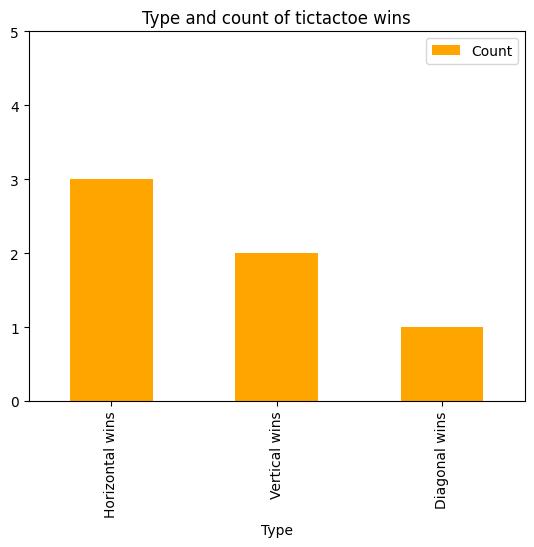

In [33]:
import random 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def check_win(board):

    horizontalwins = 0
    verticalwins = 0
    diagonalwins = 0

    player = None

    for row in board:
        if row[0] == row[1] == row[2]: # horizontal win
            horizontalwins += 1
            if row[0] == 1:
                player = 'Player1'
            else:
                player = 'Player2'
    for col in range(3):
        if board[0][col] == board[1][col] == board[2][col]: # vertical win 
            verticalwins += 1
            if board[0][col] == 1:
                player = 'Player1'
            else:
                player = 'Player2'
    if board[0][0] == board[1][1] == board[2][2]: # front diagonal win
        diagonalwins += 1
        if board[0][0] == 1:
            player = 'Player1'
        else:
            player = 'Player2'
    
    elif board[0][2] == board[1][1] == board[2][0]: # back diagonal win
        diagonalwins += 1
        if board[0][0] == 1:
            player = 'Player1'
        else:
            player = 'Player2'

    return player, horizontalwins, verticalwins, diagonalwins


def create_game():

    games = {'Player1': [], 'Player2': []}

    total_horizontal = 0
    total_vertical = 0
    total_diagonal = 0

    for _ in range(3):
        board = [[random.randint(1, 2) for _ in range(3)] for _ in range(3)]

        winner, h, v, d = check_win(board)

        total_horizontal += h
        total_vertical += v
        total_diagonal += d


        if winner:
            games[winner].append(board)

    return games, total_horizontal, total_vertical, total_diagonal


games, h, v, d = create_game()


print(games)

hvd_df = pd.DataFrame({'Type': ['Horizontal wins', 'Vertical wins', 'Diagonal wins'], 'Count': [h, v, d]})

print(hvd_df)

hvd_df.set_index('Type').plot(kind = 'bar', title = 'Type and count of tictactoe wins', ylim = (0, 5), color = 'orange')

